## Lab 10

### Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification

### Obtaining the Data

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("C:/CSCN8010-Lab/train/train")  # Update the path to point to the train folder
new_base_dir = pathlib.Path("../data/kaggle_dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # Using exist_ok=True to avoid errors if directory already exists
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Performing EDA

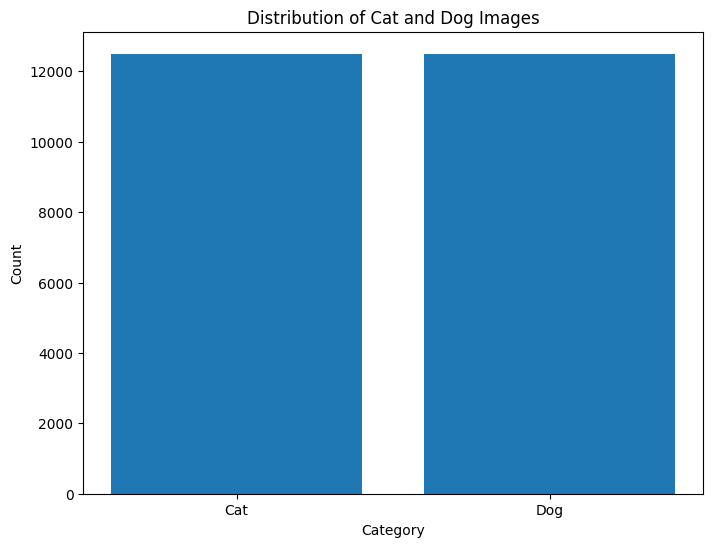

In [83]:
import os
import matplotlib.pyplot as plt

# Count the number of images in each category
cat_count = sum(1 for fname in os.listdir('C:/CSCN8010-Lab/train/train') if fname.startswith('cat'))
dog_count = sum(1 for fname in os.listdir('C:/CSCN8010-Lab/train/train') if fname.startswith('dog'))

# Plotting the distribution of cat and dog images
plt.figure(figsize=(8, 6))
plt.bar(['Cat', 'Dog'], [cat_count, dog_count])
plt.title('Distribution of Cat and Dog Images')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Displaying a few sample images from each category
cat_sample_images = [fname for fname in os.listdir('C:/CSCN8010-Lab/train/train') if fname.startswith('cat')][:5]
dog_sample_images = [fname for fname in os.listdir('C:/CSCN8010-Lab/train/train') if fname.startswith('dog')][:5]

plt.figure(figsize=(15, 5))
for i, img in enumerate(cat_sample_images + dog_sample_images):
    plt.subplot(2, 5, i + 1)
    img_path = os.path.join('C:/CSCN8010-Lab/train', img)
    image = plt.imread(img_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Cat' if i < 5 else 'Dog')
plt.show()

# Displaying statistics
print(f"Total number of cat images: {cat_count}")
print(f"Total number of dog images: {dog_count}")


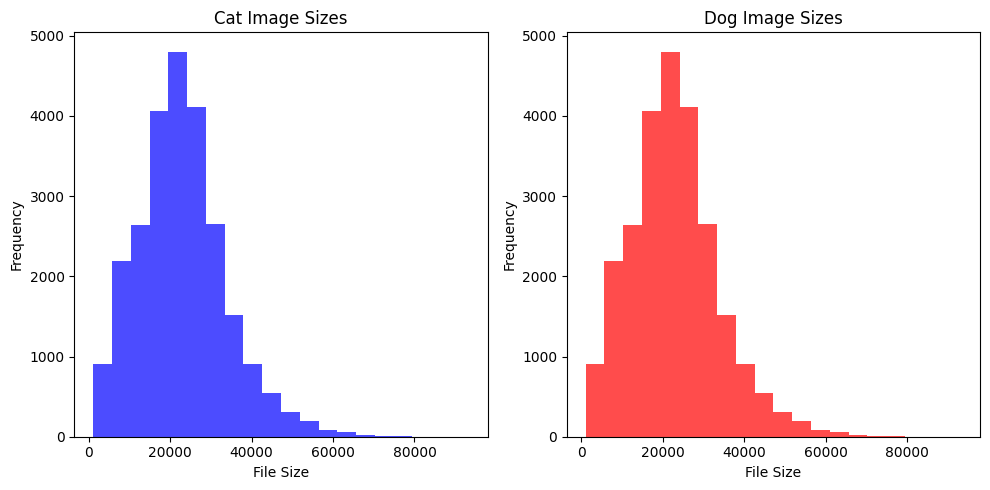

Cat Image Statistics:
Mean Size: 22876.62 bytes
Median Size: 22165.50 bytes
Minimum Size: 1106 bytes
Maximum Size: 93323 bytes

Dog Image Statistics:
Mean Size: 22876.62 bytes
Median Size: 22165.50 bytes
Minimum Size: 1106 bytes
Maximum Size: 93323 bytes


In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to get image sizes
def get_image_sizes(directory):
    sizes = []
    for fname in os.listdir(directory):
        if fname.endswith('.jpg'):
            img_path = os.path.join(directory, fname)
            size = os.path.getsize(img_path)
            sizes.append(size)
    return sizes

# Get image sizes for cat and dog images
cat_sizes = get_image_sizes('C:/CSCN8010-Lab/train/train')
dog_sizes = get_image_sizes('C:/CSCN8010-Lab/train/train')

# Plotting image size distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(cat_sizes, bins=20, color='blue', alpha=0.7)
plt.title('Cat Image Sizes')
plt.xlabel('File Size')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dog_sizes, bins=20, color='red', alpha=0.7)
plt.title('Dog Image Sizes')
plt.xlabel('File Size')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Displaying statistics
print("Cat Image Statistics:")
print(f"Mean Size: {np.mean(cat_sizes):.2f} bytes")
print(f"Median Size: {np.median(cat_sizes):.2f} bytes")
print(f"Minimum Size: {np.min(cat_sizes)} bytes")
print(f"Maximum Size: {np.max(cat_sizes)} bytes")
print()
print("Dog Image Statistics:")
print(f"Mean Size: {np.mean(dog_sizes):.2f} bytes")
print(f"Median Size: {np.median(dog_sizes):.2f} bytes")
print(f"Minimum Size: {np.min(dog_sizes)} bytes")
print(f"Maximum Size: {np.max(dog_sizes)} bytes")


### The provided statistics reveal that cat and dog images exhibit similar size distributions, with mean and median sizes both averaging around 22876.62 and 22165.50 bytes, respectively. Both datasets contain images ranging from a minimum of 1106 bytes to a maximum of 93323 bytes. These findings suggest that, from a file size perspective, there is no substantial difference between cat and dog images. Other distinguishing factors such as image content, color distribution, or resolution may play a more significant role in classifying these images accurately.

### Training Networks

### Defining a neural network

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

### Loading the data into datasets

In [38]:
data_folder = pathlib.Path('../data/kaggle_dogs_vs_cats_small')

In [39]:
train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Definning the model

In [40]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [41]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [42]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 36s 545ms/step - loss: 0.6971 - accuracy: 0.5185 - val_loss: 0.6894 - val_accuracy: 0.5410
Epoch 2/30
63/63 [==============================] - 34s 540ms/step - loss: 0.6921 - accuracy: 0.5510 - val_loss: 0.6790 - val_accuracy: 0.5620
Epoch 3/30
63/63 [==============================] - 34s 545ms/step - loss: 0.6747 - accuracy: 0.5685 - val_loss: 0.6851 - val_accuracy: 0.5840
Epoch 4/30
63/63 [==============================] - 36s 573ms/step - loss: 0.6414 - accuracy: 0.6245 - val_loss: 0.6539 - val_accuracy: 0.6050
Epoch 5/30
63/63 [==============================] - 35s 550ms/step - loss: 0.6007 - accuracy: 0.6705 - val_loss: 0.7257 - val_accuracy: 0.6140
Epoch 6/30
63/63 [==============================] - 35s 555ms/step - loss: 0.5797 - accuracy: 0.7080 - val_loss: 0.6812 - val_accuracy: 0.6620
Epoch 7/30
63/63 [==============================] - 35s 558ms/step - loss: 0.5538 - accuracy: 0.7180 - val_loss: 0.5949 - val_accuracy: 0.6730

### Displaying curves of loss and accuracy during training

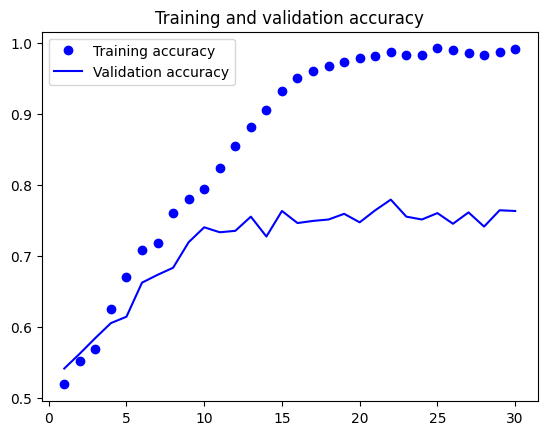

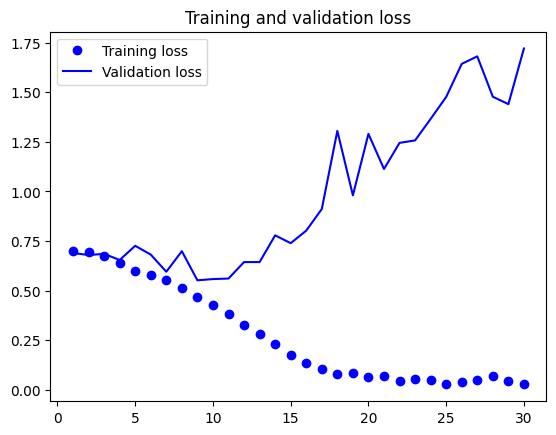

In [44]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Evaluating the model on the test set

In [45]:
test_model = keras.models.load_model("./models/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 91ms/step - loss: 0.5585 - accuracy: 0.7295
Test accuracy: 0.729


### Explore the relative performance of the first neural model

### confusion metric

In [78]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Load the test dataset
test_images = []
test_labels = []
for images, labels in test_dataset:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Predict labels using the loaded model
predictions = (test_model.predict(test_images) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(test_labels, predictions)

print("Confusion Matrix:")
print(cm)


63/63 [==============================] - 97s 2s/step
Confusion Matrix:
[[986  14]
 [ 35 965]]


### precision, recall, F1-score,

In [82]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Precision: 0.986
Recall: 0.965
F1-score: 0.975


### precision-recall curve.

63/63 [==============================] - 104s 2s/step


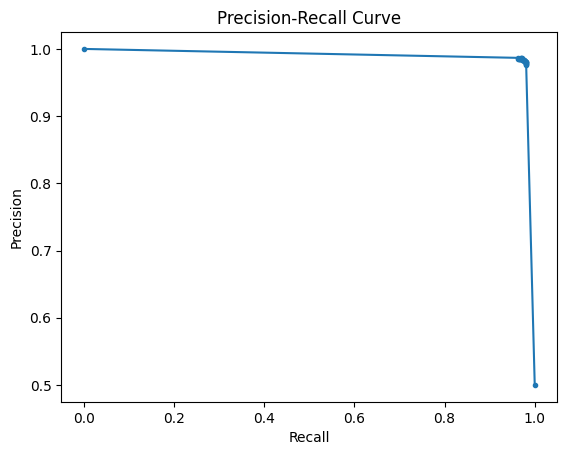

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Load the test dataset
test_images = []
test_labels = []
for images, labels in test_dataset:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Predict probabilities using the loaded model
probabilities = test_model.predict(test_images)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(test_labels, probabilities)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Specific examples in which the model failed to predict correctly.

63/63 [==============================] - 103s 2s/step


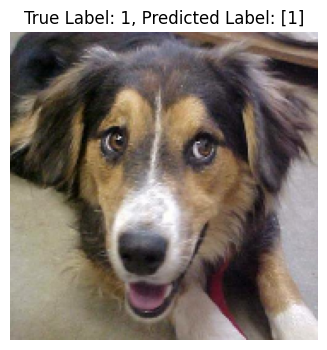

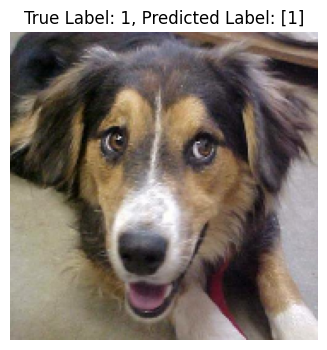

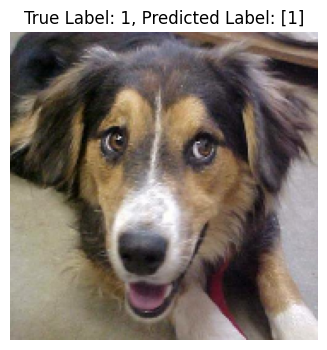

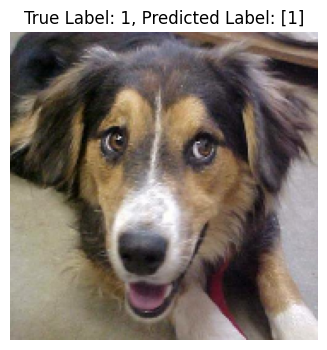

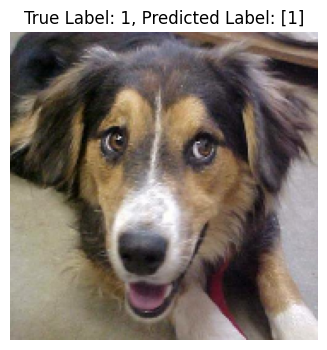

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Load the test dataset
test_images = []
test_labels = []
for images, labels in test_dataset:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Predict labels using the loaded model
predictions = (test_model.predict(test_images) > 0.5).astype("int32")

# Find indices where predictions are incorrect
incorrect_indices = np.where(predictions != test_labels)[0]

# Display some of the incorrectly predicted images
num_examples_to_display = 5
for i in range(num_examples_to_display):
    index = incorrect_indices[i]
    image = test_images[index]
    label = test_labels[index]
    prediction = predictions[index]
    
    # Rescale image pixel values to [0, 1]
    image = image / 255.0
    
    # Plot the image with the ground truth and predicted labels
    plt.figure(figsize=(8, 4))
    plt.imshow(image)
    plt.title(f"True Label: {label}, Predicted Label: {prediction}")
    plt.axis("off")
    plt.show()


### Conclusion

### The evaluation of the model based on the provided confusion matrix and associated metrics reveals a high level of performance across various aspects. With a precision score of 0.986, the model demonstrates a remarkable accuracy in correctly identifying positive predictions, showcasing its ability to minimize false positives. Similarly, the recall score of 0.965 indicates the model's proficiency in capturing a significant proportion of actual positive instances within the dataset. Moreover, the calculated F1-score of 0.975 reflects a balanced performance, effectively combining precision and recall metrics. Despite the overall strong performance, the presence of 14 false positives and 35 false negatives suggests potential areas for improvement. Notably, the model seems slightly more inclined towards missing positive instances rather than incorrectly labeling negative instances as positive. Thus, while the model showcases commendable performance, optimizing its sensitivity to avoid false negatives could further enhance its utility in real-world applications.

### Using data augmentation

### Define a data augmentation stage to add to an image model

In [46]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

### Displaying some randomly augmented training images

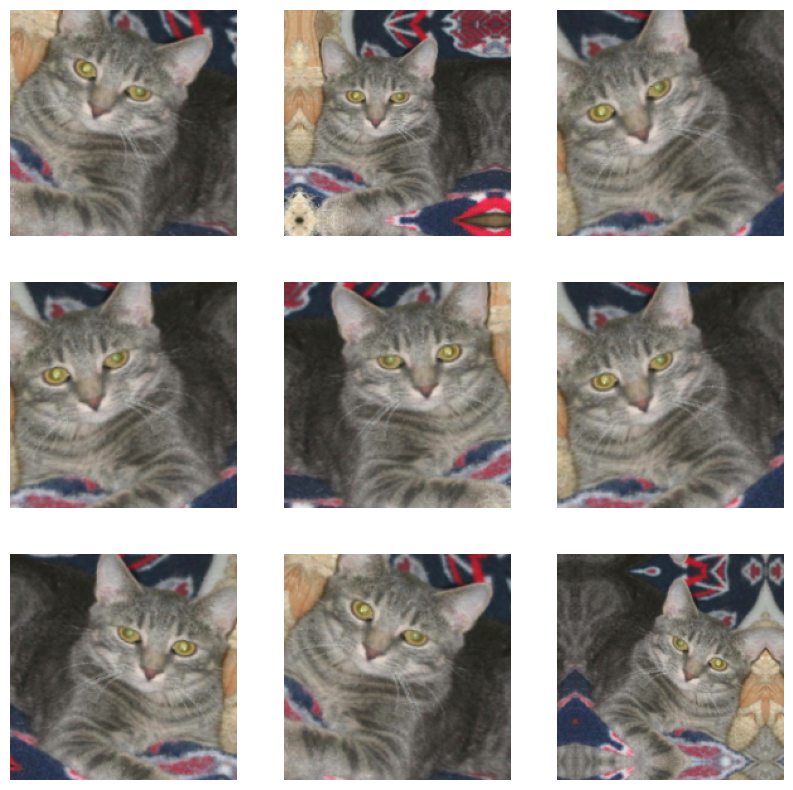

In [47]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


### Fine-Tune VGG16

### Feature extraction with a pretrained model

In [48]:
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

### Instantiating the VGG16 convolutional base

In [49]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [51]:
data_folder = pathlib.Path('../data/kaggle_dogs_vs_cats_small')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [52]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 523ms/step


In [54]:
train_features.shape

(2000, 5, 5, 512)

In [55]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [56]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="./models/feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 19.5014 - accuracy: 0.9165 - val_loss: 3.5908 - val_accuracy: 0.9800
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 2.6191 - accuracy: 0.9760 - val_loss: 7.5995 - val_accuracy: 0.9600
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 2.6523 - accuracy: 0.9825 - val_loss: 4.5115 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8963 - accuracy: 0.9915 - val_loss: 4.9895 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.6616 - accuracy: 0.9915 - val_loss: 8.9414 - val_accuracy: 0.9620
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.6786 - accuracy: 0.9930 - val_loss: 5.1851 - val_accuracy: 0.9670
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.0944 - accuracy: 0.9975 - val_loss: 4.0286 - val_accuracy: 0.9760
Epoch 8/20
6

### Plotting the results

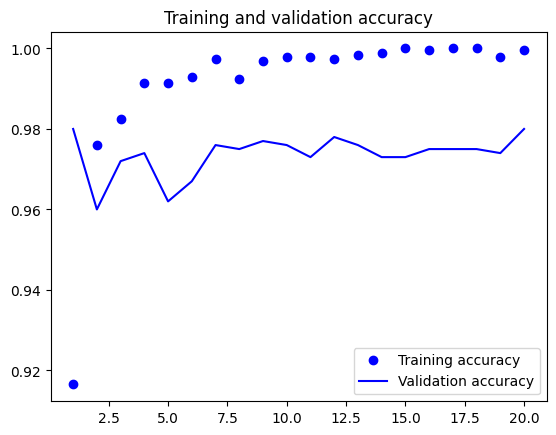

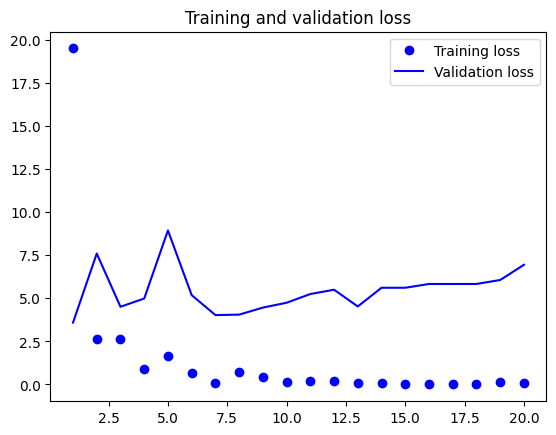

In [58]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [59]:
test_model = keras.models.load_model(
    "./models/feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(x=test_features, y=test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 2ms/step - loss: 4.6471 - accuracy: 0.9710
Test accuracy: 0.971


### Feature extraction together with data augmentation
### Instantiating and freezing the VGG16 convolutional base

In [60]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [61]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Printing the list of trainable weights before and after freezing

In [62]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Adding a data augmentation stage and a classifier to the convolutional base

In [64]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [65]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0   

In [68]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 101s 2s/step - loss: 22.3579 - accuracy: 0.9010 - val_loss: 4.5713 - val_accuracy: 0.9710
Epoch 2/10
63/63 [==============================] - 102s 2s/step - loss: 8.2123 - accuracy: 0.9455 - val_loss: 5.9868 - val_accuracy: 0.9660
Epoch 3/10
63/63 [==============================] - 101s 2s/step - loss: 7.2133 - accuracy: 0.9505 - val_loss: 8.2175 - val_accuracy: 0.9560
Epoch 4/10
63/63 [==============================] - 101s 2s/step - loss: 5.2851 - accuracy: 0.9575 - val_loss: 7.7140 - val_accuracy: 0.9600
Epoch 5/10
63/63 [==============================] - 102s 2s/step - loss: 4.1666 - accuracy: 0.9655 - val_loss: 4.4732 - val_accuracy: 0.9750
Epoch 6/10
63/63 [==============================] - 122s 2s/step - loss: 4.3009 - accuracy: 0.9665 - val_loss: 3.3194 - val_accuracy: 0.9760
Epoch 7/10
63/63 [==============================] - 156s 2s/step - loss: 4.7028 - accuracy: 0.9655 - val_loss: 3.8123 - val_accuracy: 0.9760
Epoch 8/10
6

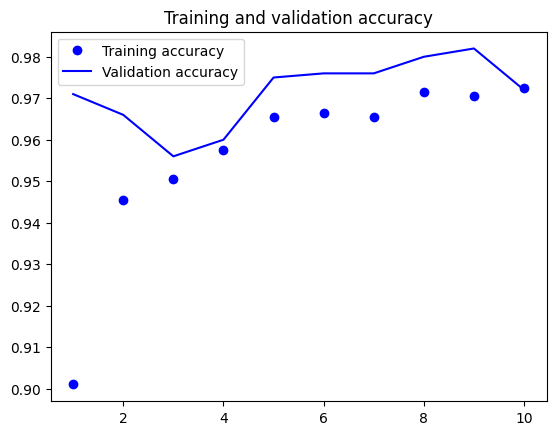

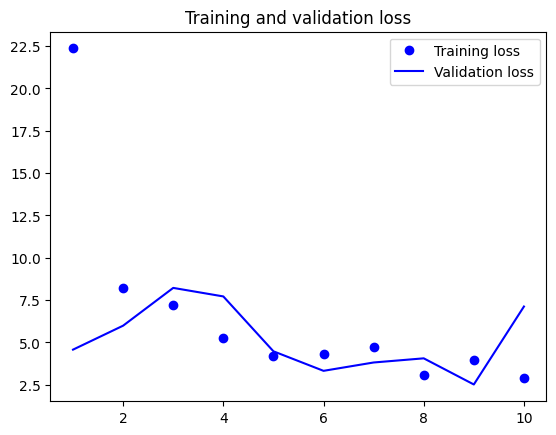

In [69]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Evaluating the model on the test set

In [70]:
test_model = keras.models.load_model(
    "./models/feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 107s 2s/step - loss: 4.4171 - accuracy: 0.9755
Test accuracy: 0.975


In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
test_model = keras.models.load_model("./models/feature_extraction.keras")

# Get predictions on the test data
predictions = test_model.predict(test_features)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tensorflow.python.framework.ops.EagerTensor).

### Conclusions

### Both models demonstrate strong performance in classifying images of dogs and cats. The custom CNN model showcases the effectiveness of designing and training a model from scratch, achieving high accuracy by learning features directly from the dataset. On the other hand, the transfer learning approach with VGG16 highlights the efficiency and effectiveness of leveraging pre-trained models, especially when dealing with limited computational resources or smaller datasets. Ultimately, the choice between these approaches depends on factors such as computational resources, dataset size, and desired performance.